# Исследование данных о российском кинопрокате



***Описание проекта***
- Заказчик этого исследования — Министерство культуры Российской Федерации. 
- Нужно изучить рынок российского кинопроката и выявить текущие тренды. 
- Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

***Описание данных***
<br>Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 


- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

## Изучение данных 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
#считываем данные из файла csv в датафрейм и сохраняем их в переменной movies
movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [4]:
#выведем первые 5 строк
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
movies.dtypes

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

In [6]:
#считываем данные из файла csv в датафрейм и сохраняем их в переменной shows
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [7]:
#избавимся от экспоненты
pd.options.display.float_format = '{:,.1f}'.format

In [8]:
#выведем первые 5 строк
shows.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [9]:
shows.dtypes

puNumber        int64
box_office    float64
dtype: object

In [10]:
movies['puNumber'] = movies['puNumber'].str.strip()

In [11]:
#приводим столбец, по которому будет проходить объединение, к одному типу
shows['puNumber'] = shows['puNumber'].astype('str')

In [12]:
shows['puNumber'] = shows['puNumber'].str.strip()

In [13]:
shows.dtypes

puNumber       object
box_office    float64
dtype: object

In [14]:
#объединим два датафрейма в один - data
data = movies.merge(shows, how='left', on='puNumber')

In [15]:
data.shape

(7486, 16)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


## Предобработка данных

### Типы данных

In [18]:
data.dtypes

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [19]:
#посмотрим, какие значения содержатся в данном столбце
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [20]:
#уберем знак процента из значений
data['ratings'] = data['ratings'].str.replace('%', '')

In [21]:
len(data['ratings'].unique())

95

In [22]:
#переведем столбец из object в float
data['ratings'] = data['ratings'].astype('float')

In [23]:
#преобразуем проценты в доли
data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings'] / 10

In [24]:
len(data['ratings'].unique())

85

In [25]:
#преобразуем столбец с датой к правильному типу
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y.%m.%dT%H:%M:%S')

In [26]:
data.dtypes

title                                 object
puNumber                              object
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

Все столбцы приведены к соответствующим типам

### Изучение пропусков в датафрейме


In [27]:
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

Информации о финансах нам не известа, здесь не може заменить пропуски

### Изучение дубликатов в датафрейме

In [28]:
data.duplicated().sum()

0

In [29]:
data.shape

(7486, 16)

In [30]:
data.nunique().sort_values(ascending=False)

puNumber                 7484
title                    6772
film_studio              5490
producer                 5349
director                 4811
box_office               2938
show_start_date          1965
production_country        950
genres                    742
budget                    290
ratings                    84
nonrefundable_support      75
refundable_support         34
type                        8
age_restriction             5
financing_source            3
dtype: int64

In [31]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Несмотря на повторяющийся номер прокатного удостоверения, остальные данные отличаются, оставим эти строки без изменений

### Изучение категориальные значения

In [32]:
data.dtypes

title                                 object
puNumber                              object
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

In [33]:
data['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [34]:
#удалим пробелы из начала и конца строк
data['type'] = data['type'].str.strip()

In [35]:
data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [36]:
len(data['film_studio'].unique())

5491

In [37]:
#удалим пробелы из начала и конца строк, заменим ё на е
data['film_studio'] = data['film_studio'].replace('ё', 'е').str.strip().str.lower()

In [38]:
len(data['film_studio'].unique())

5423

In [39]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [40]:
len(data['production_country'].unique())

951

In [41]:
#удалим пробелы из начала и конца строк, заменим ё на е
data['production_country'] = data['production_country'].replace('ё', 'е').str.strip()

In [42]:
len(data['production_country'].unique())

935

In [43]:
data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

In [44]:
data['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

In [45]:
len(data['director'].unique())

4812

In [46]:
#удалим пробелы из начала и конца строк, заменим ё на е
data['director'] = data['director'].replace('ё', 'е').str.strip()

In [47]:
len(data['director'].unique())

4802

In [48]:
data['producer'].sort_values().unique()

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

In [49]:
len(data['producer'].unique())

5350

In [50]:
#удалим пробелы из начала и конца строк, заменим ё на е
data['producer'] = data['producer'].replace('ё', 'е').str.strip()

In [51]:
len(data['producer'].unique())

5335

In [52]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [53]:
data['financing_source'].sort_values().unique()

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

In [54]:
len(data['genres'].unique())

743

In [55]:
#удалим пробелы из начала и конца строк, заменим ё на е
data['genres'] = data['genres'].replace('ё', 'е').str.strip()

In [56]:
len(data['genres'].unique())

743

Неявнве дубликаты заменены там, где это возможно

### Обработка количественные значения

In [57]:
#проверим наличие строк, где сумма бюджета меньше, чем объем средств поддержки
invalid_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
invalid_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ооо киностудия ""сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ооо ""кинокомпания ""коктебель""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ооо ""кинофирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0"


В некоторых фильмах с гос. поддержкой стоит бюджет = 0, изменим эти данные

In [58]:
#найдем медиану процента гос. поддержки в бюджете фильма
support_percentage = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).median()

#вставим в столбец данных о бюджете следующие значения
data.loc[invalid_budget.index, 'budget'] = \
(data.loc[invalid_budget.index, 'refundable_support'] + \
data.loc[invalid_budget.index, 'nonrefundable_support']) / support_percentage

#проверим вставку
data.loc[invalid_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ооо киностудия ""сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0","37,456,987.9","Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0","122,142,351.8",Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0","130,285,175.2",Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,"32,571,293.8",Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0","260,570,350.4",Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ооо ""кинокомпания ""коктебель""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0","96,085,316.7",Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0","56,999,764.2",Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ооо ""кинофирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0","9,771,388.1",Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0","113,999,528.3",Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0","407,141,172.5",Фонд кино,5.6,фантастика,"1,038,321,489.0"


### Добавление новых признаков

In [59]:
#создаем столбец с годом выхода фильма
data['year_show_start'] = data['show_start_date'].dt.year

In [60]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


In [61]:
#создаем столбцы с именем, фамилией главного режиссёра и основным жанром фильма
def add_columns(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

In [62]:
data = add_columns(data, ['director', 'genres'])

In [63]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [64]:
#определяем какую долю от общего бюджета фильма составляет государственная поддержка
data['support_percentage'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [65]:
print(f'Медианная доля гос. поддержки: {data["support_percentage"].median()}')
print(f'Средняя доля гос. поддержки: {data["support_percentage"].mean()}')

Медианная доля гос. поддержки: 0.6133641349406089
Средняя доля гос. поддержки: 0.5223348581647279


## Исследовательский анализ данных

Посмотрим, сколько фильмов выходило в прокат каждый год. 
Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. 

In [66]:
#выведем информацию о количестве фильмов, выходящих каждый год
shows_per_year = data.pivot_table(index='year_show_start', values='puNumber', aggfunc='count')
shows_per_year

,puNumber
year_show_start,
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891


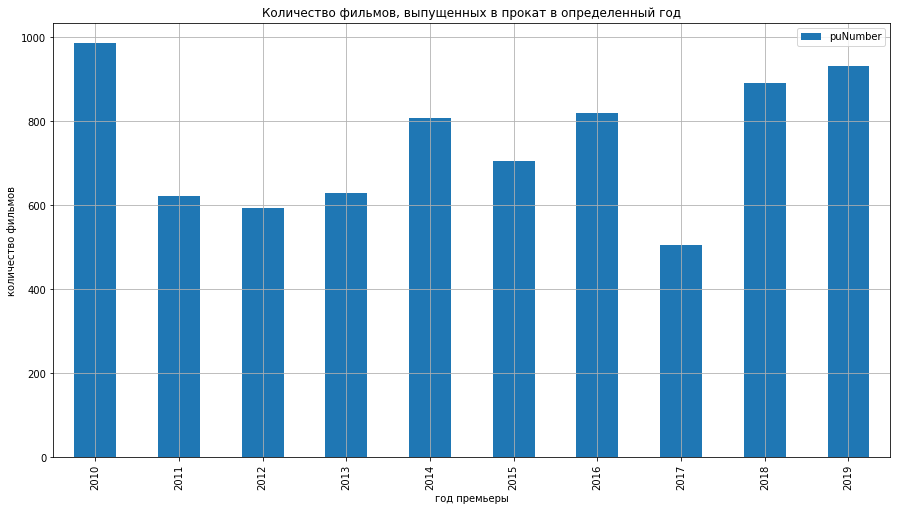

In [67]:
shows_per_year.plot(kind='bar', grid=True, figsize=(15,8));
plt.title('Количество фильмов, выпущенных в прокат в определенный год');
plt.xlabel('год премьеры');
plt.ylabel('количество фильмов');

***Вывод:*** больше всего фильмов вышло в 2010, 2019 и 2018 годах соответственно, меньше всего - в 2017 году.

In [68]:
print(f'Количество фильмов, для которых есть информация о прокате в кинотеатрах: {data["box_office"].notna().sum()}')
print(f'Доля фильмов, для которых есть информация о прокате в кинотеатрах: {data["box_office"].notna().mean()}')

Количество фильмов, для которых есть информация о прокате в кинотеатрах: 3158
Доля фильмов, для которых есть информация о прокате в кинотеатрах: 0.42185412770504943


Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [69]:
year_box_office = data.pivot_table(index='year_show_start', values='box_office', aggfunc='sum')
year_box_office

,box_office
year_show_start,
2010,"2,428,654.0"
2011,"14,102,765.0"
2012,"6,955,423.0"
2013,"29,799,706.2"
2014,"7,444,951,859.2"
2015,"39,497,365,196.4"
2016,"47,866,299,741.9"
2017,"48,563,707,217.5"
2018,"49,668,403,134.3"


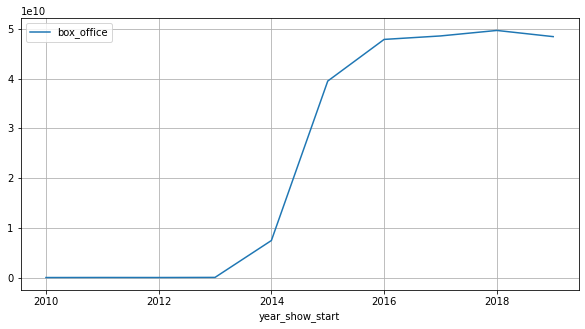

In [70]:
year_box_office.plot(kind='line', grid=True, figsize=(10,5));

In [71]:
print(f'Cумма сборов была максимальной в {year_box_office.idxmax()[0]} году') 
print(f'Cумма сборов была минимальной в {year_box_office.idxmin()[0]} году') 

Cумма сборов была максимальной в 2018 году
Cумма сборов была минимальной в 2010 году


Посчитаем среднюю и медианную сумму сборов для каждого года.

In [72]:
box_office_mean_median = data.pivot_table(index='year_show_start', values='box_office', aggfunc=['mean', 'median'])
box_office_mean_median.columns = ['mean', 'median']
box_office_mean_median

,mean,median
year_show_start,,
2010,"23,130.0","1,700.0"
2011,"129,383.2","3,000.0"
2012,"54,339.2","5,660.0"
2013,"161,954.9","3,522.5"
2014,"26,684,415.3","18,160.0"
2015,"84,940,570.3","4,920,933.0"
2016,"91,000,569.9","3,846,679.4"
2017,"136,032,793.3","9,968,340.0"
2018,"104,565,059.2","8,891,102.2"


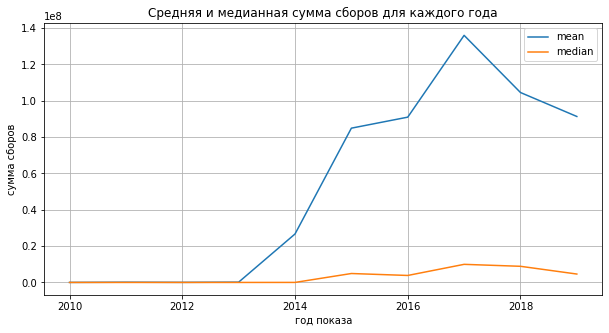

In [73]:
box_office_mean_median.plot(kind='line', grid=True, figsize=(10,5));
plt.title('Средняя и медианная сумма сборов для каждого года');
plt.xlabel('год показа');
plt.ylabel('сумма сборов');

***Вывод:*** средняя и медианная сумма сборов была максимальной в 2017 году, минимальной в 2010, при этом после 2013 года средний показатель значительно выше медианного

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [74]:
data_last = data[data['year_show_start'] >= 2015]

In [75]:
print('Зависимость  сборов от возрастного ограничения')
depend_age = data_last.pivot_table(index='year_show_start', columns='age_restriction', 
                                   values='box_office', aggfunc=['sum'])
depend_age

Зависимость  сборов от возрастного ограничения


sum  \
age_restriction «0+» - для любой зрительской аудитории   
year_show_start                                          
2015                                     379,054,578.4   
2016                                     150,228,848.7   
2017                                     229,598,930.0   
2018                                      32,449,002.1   
2019                                      17,746,066.8   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year_show_start                                   
2015                           13,616,082,008.9   
2016                           12,204,446,524.4   
2017                            7,851,427,660.7   
2018                           14,267,291,660.7   
2019                           12,680,198,773.7   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year_show_start                                                               
2015                           11,368,120,870.3             5,432,308,367.4   
2016                           16,664,548,541.7             6,793,929,818.9   
2017                           18,745,042,900.1             9,651,495,581.0   
2018                           16,503,602,347.0             8,760,085,501.1   
2019                           12,753,418,984.6            10,121,796,303.6   

                                               
age_restriction «6+» - для детей старше 6 лет  
year_show_start                                
2015                          8,701,799,371.4  
2016                         12,053,146,008.2  
2017                         12,086,142,145.8  
2018                         10,104,974,623.4  
2019                         12,852,548,650.9

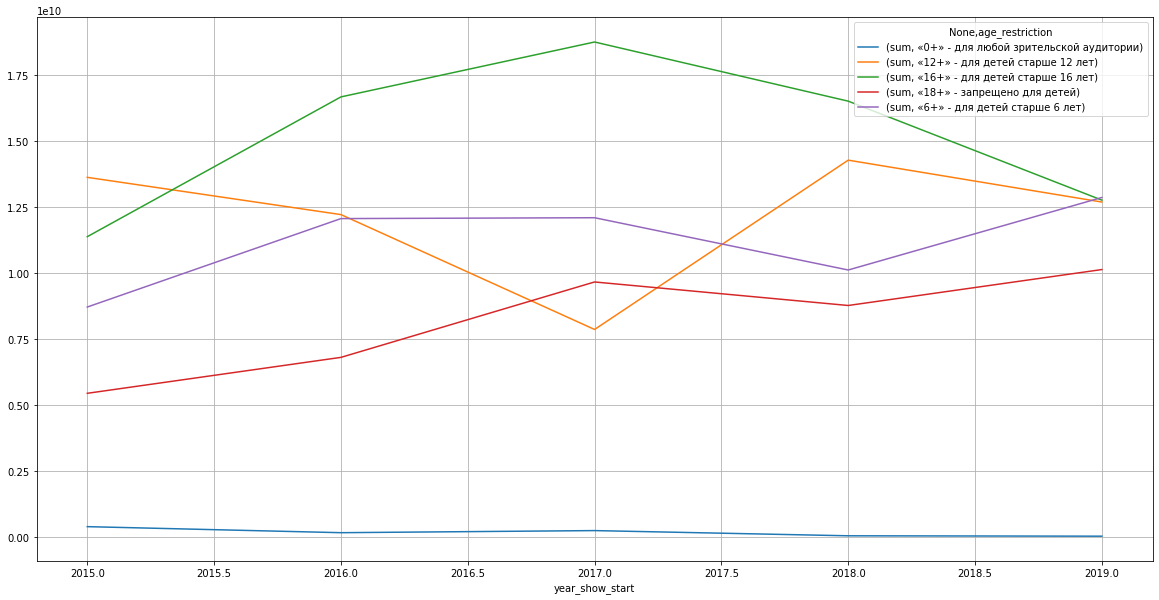

In [76]:
depend_age.plot(kind='line', grid=True, figsize=(20,10));

***Из графика видно, что больше всего денег с прокатов собрали фильмы с возрастным ограничением - 16+, меньше всего - фильмы с ограничением 0+***
<br>Однако фильмы с огрничением 12+ вели себя нестабильно на протяжении рассматриваемых лет: 
1. в 2015 году они были самыми кассовыми
2. в 2016 году почти сравнялись с фильмами с ограничением 6+
3. в 2017 их сборы сильно упали и стали ниже сборов фильмом с ограниченями: 16+, 6+ и 18+ соответственно 
4. в 2018 они снова стали 2-ми по сборам и приблизились к фильмам с ограничением - 16+
5. в 2019 же фильмы с ограничениями: 6+, 16+, 12+ приблизились почти к равному показателю сборов

***На это могло повлиять:***
1. Зрелищность фильмов той или иной категории определенного года
2. Количество зрителей определенной категории

## Исследование фильмов, которые получили государственную поддержку

In [77]:
#найдем количество и сумму сборов фильмов с определенной гос поддержкой
finance = data.pivot_table(index='financing_source', values='box_office', aggfunc=['count', 'sum'])
finance.columns = ['count', 'sum']
finance.sort_values(by='sum', ascending=False)

,count,sum
financing_source,,
Фонд кино,144,"35,986,152,828.6"
Министерство культуры,152,"5,322,018,327.9"
"Министерство культуры, Фонд кино",22,"805,338,418.3"


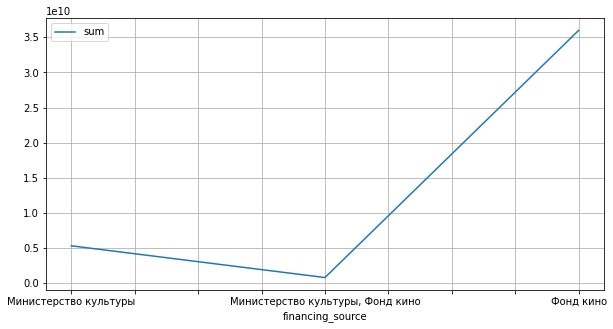

In [78]:
finance.plot(kind='line', grid=True, figsize=(10,5), y='sum');

***Вывод:*** больше сборов получили фильмы, поддерживаемые Фондом кино, меньше всего поддерживаемые Министерством культуры и Фондом кино, соберем эти фильмы в один датафрейм

In [79]:
#соберем фильмы с гос поддержкой в один датафрейм
data_finance_support = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()].copy()

In [80]:
#добавим общую поддержку фильмов
data_finance_support['full_support'] = data_finance_support['refundable_support'] + \
data_finance_support['nonrefundable_support'];

In [81]:
#добавим рентабильность фильмов
data_finance_support['profitability'] = data_finance_support['box_office'] / data_finance_support['full_support'] - 1

In [82]:
#добавим окупаемость фильмов
data_finance_support['is_paid_off'] = data_finance_support['profitability'] > 0

In [83]:
data_finance_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year_show_start,main_director,main_genres,support_percentage,full_support,profitability,is_paid_off
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама","365,353.6",2013,А.Атанесян,драма,0.3,"26,500,000.0",-1.0,False
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,NaN,"28,140.0",2014,А.Якимчук,NaN,0.7,"26,000,000.0",-1.0,False
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика","19,957,031.5",2013,Р.Давлетьяров,комедия,0.6,"107,847,945.0",-0.8,False
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,"55,917.5",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7,"28,000,000.0",-1.0,False
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,"232,100.0",2014,М.Угаров,драма,0.6,"25,000,000.0",-1.0,False


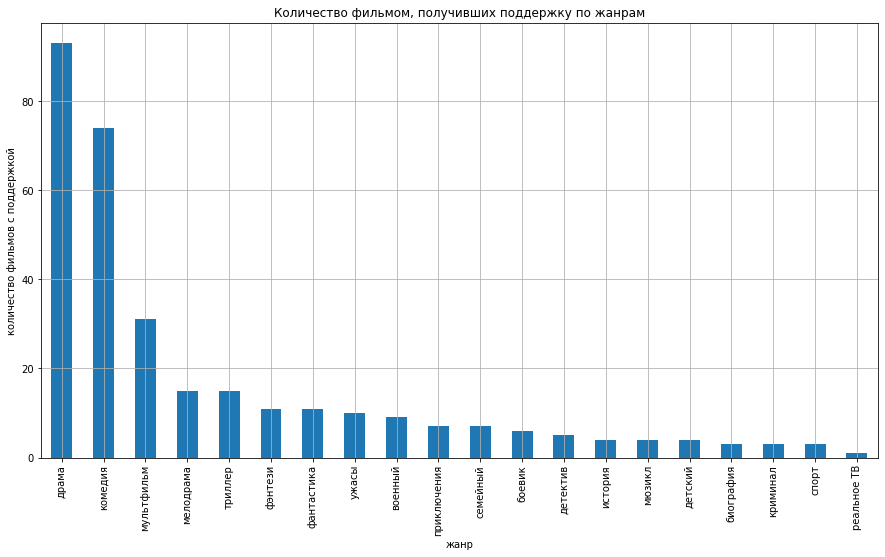

In [84]:
data_finance_support['main_genres'].value_counts().plot(kind='bar', figsize=(15,8), grid=True);
plt.title('Количество фильмом, получивших поддержку по жанрам');
plt.xlabel('жанр');
plt.ylabel('количество фильмов с поддержкой');

***Вывод:*** больше всего получили поддержку драмы, комедии и мультфильмы, меньше всего - рекламное ТВ

In [85]:
genre_rating = data_finance_support.pivot_table(index='main_genres', values='ratings', aggfunc=['mean', 'median'])
genre_rating.columns = ['mean', 'median']
genre_rating.sort_values(by='mean', ascending=False)

,mean,median
main_genres,,
криминал,7.5,7.8
детский,7.1,7.2
спорт,6.9,7.0
биография,6.9,6.9
детектив,6.8,6.8
боевик,6.6,6.4
мюзикл,6.5,6.6
военный,6.5,6.4
драма,6.4,6.4


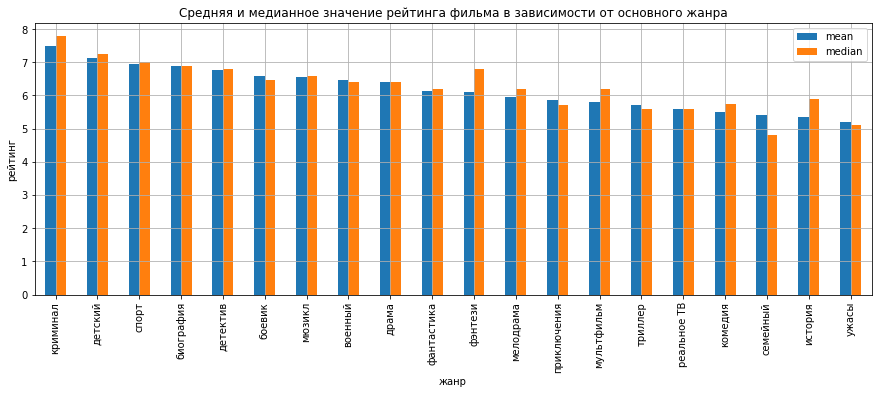

In [86]:
genre_rating.sort_values(by='mean', ascending=False).plot(kind='bar', grid=True, figsize=(15,5));
plt.title('Средняя и медианное значение рейтинга фильма в зависимости от основного жанра');
plt.xlabel('жанр');
plt.ylabel('рейтинг');

***Вывод:*** жанры с самыми высокими рейтингами - криминал, детский и спорт, а семейный, исторический и ужасы имеют самые низкие рейтинги соответственно

In [87]:
genre_is_paid_off = data_finance_support.pivot_table(index='main_genres', values='is_paid_off', aggfunc=['count', 'sum', 'mean'])
genre_is_paid_off.columns = ['count', 'sum', 'mean']
genre_is_paid_off.sort_values('mean', ascending=False)

,count,sum,mean
main_genres,,,
спорт,3,3,1.0
история,4,3,0.8
приключения,7,5,0.7
биография,3,2,0.7
боевик,6,4,0.7
мультфильм,31,20,0.6
семейный,7,4,0.6
фантастика,11,6,0.5
ужасы,10,5,0.5


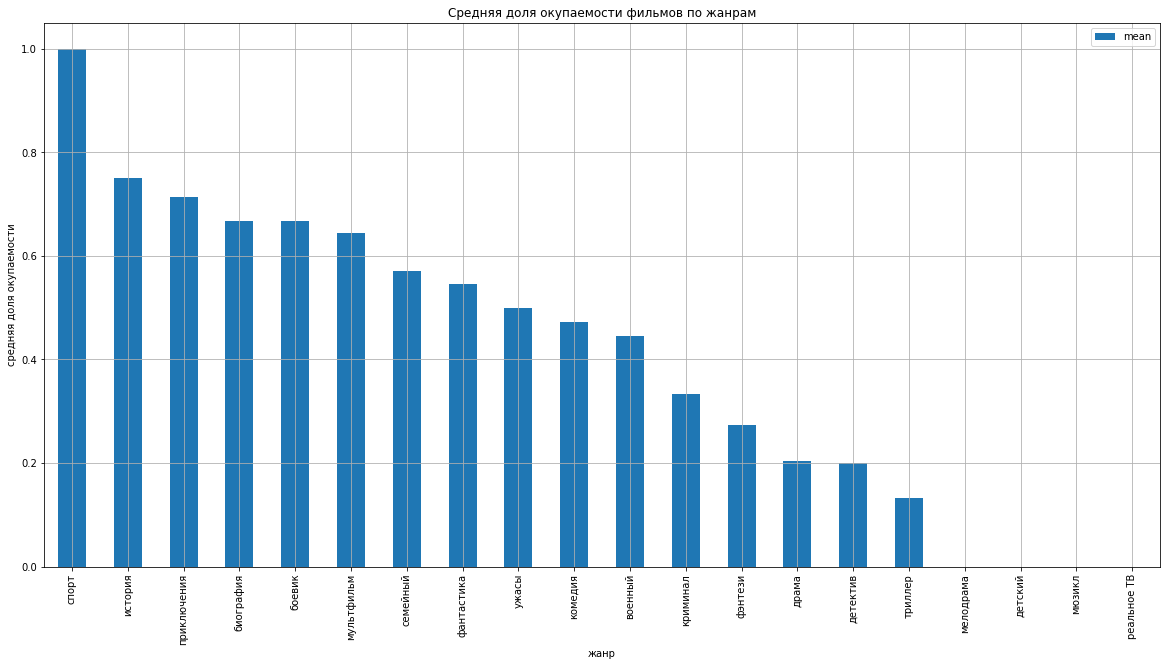

In [88]:
genre_is_paid_off.sort_values('mean', ascending=False).plot(kind='bar', grid=True, figsize=(20,10), y=['mean']);
plt.title('Средняя доля окупаемости фильмов по жанрам');
plt.xlabel('жанр');
plt.ylabel('средняя доля окупаемости');

***Вывод:*** самые большие показатели окупаемости (а именно = 1, то есть фильмы данного жанра всегда безубыточны) - у фильмов спортивного жанра, а фильмы, которые не приносят достаточно прибыли - это мелодрамы, детские фильмы, мюзиклы и рекламное ТВ

In [89]:
genre_profitability = data_finance_support.pivot_table(index='main_genres', values='profitability', aggfunc=['count', 'sum', 'mean'])
genre_profitability.columns = ['count', 'sum', 'mean']
genre_profitability.sort_values('mean', ascending=False)

,count,sum,mean
main_genres,,,
биография,3,13.5,4.5
приключения,6,22.8,3.8
спорт,3,9.5,3.2
комедия,73,168.8,2.3
военный,9,15.8,1.8
мультфильм,30,51.2,1.7
боевик,6,7.8,1.3
ужасы,10,8.1,0.8
семейный,6,3.3,0.6


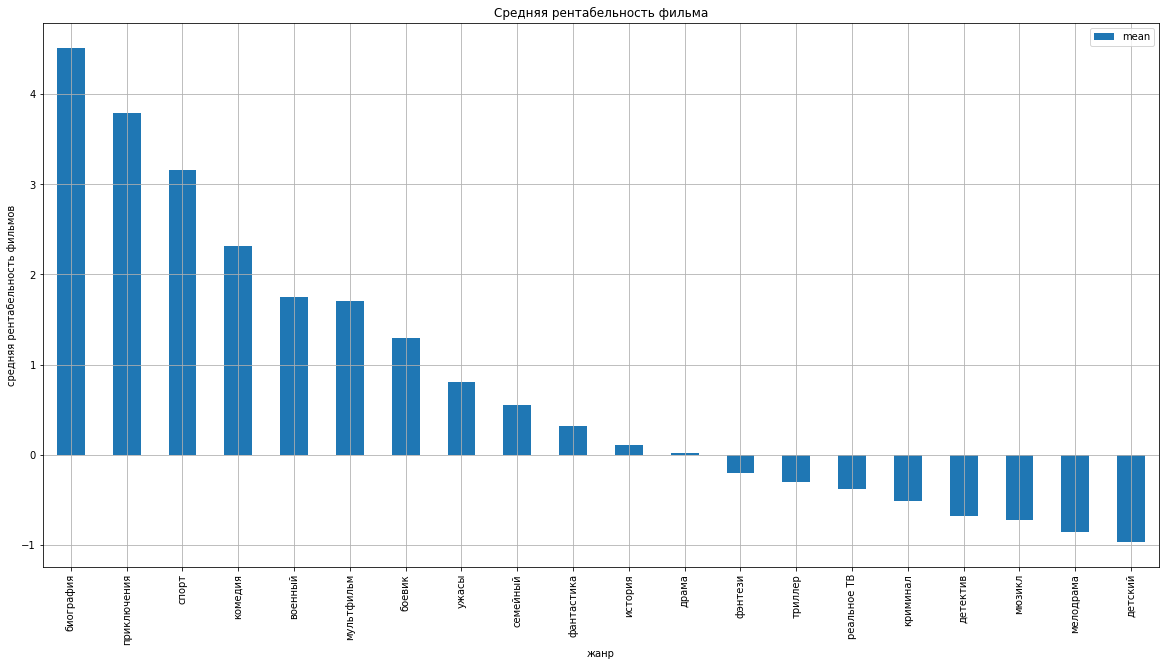

In [90]:
genre_profitability.sort_values('mean', ascending=False).plot(kind='bar', grid=True, figsize=(20,10), y=['mean']);
plt.title('Средняя рентабельность фильма');
plt.xlabel('жанр');
plt.ylabel('средняя рентабельность фильмов');

***Вывод:*** биографические, приключенческие и спортивные фильмы имеют самую высокую прибыльность, в то время как фильмы следующих жанров имеют убыточную рентабельность: фэнтези, триллер, рекламное ТВ, криминал, детектив, мюзикл, мелодрама, детские фильмы.

## Общий вывод

**Данный проект был нацелен на изучение рынка российского кинопроката и выявление текущих трендов.**

<br>***В ходе работы над проектом:***
1. Проанализированы общие сведения о датафрейме
2. Обработаны пропущенные значения в столбцах
3. Изменены типы данных некоторых столбцов
4. Обработаны неявные дубликаты
5. Обработаны подозрительные количественные значения
6. Добавлены новые столбцы, а именно: с информацией о годе проката; с именем и фамилией главного режиссёра; основным жанром фильма
7. Найдено, какую долю от общего бюджета фильма составляет государственная поддержка
8. Проанализировано, как доля фильмов с указанной информацией о прокате в кинотеатрах менялась по годам
9. Изучено, как менялась динамика проката по годам, в каком году сумма сборов была минимальной и максимальной
10. Посчитаны средняя и медианная сумма сборов для каждого года
11. Проанализировано влияние возрастного ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год
12. Изучены фильмы, получившие государственную поддержку

<br>***Из проведенного анализа можно сделать следующие выводы:***
1. Количество фильмов, для которых есть информация о прокате в кинотеатрах: 3158
2. Доля фильмов, для которых есть информация о прокате в кинотеатрах: 0.42185412770504943
3. Cумма сборов была максимальной в 2018 году
4. Cумма сборов была минимальной в 2010 году
5. Больше всего денег с прокатов собрали фильмы с возрастным ограничением - 16+, меньше всего - фильмы с ограничением 0+.
<br>Однако фильмы с огрничением 12+ вели себя нестабильно на протяжении 2015-2019:
- в 2015 году они были самыми кассовыми
- в 2016 году почти сравнялись с фильмами с ограничением 6+
- в 2017 их сборы сильно упали и стали ниже сборов фильмом с ограниченями: 16+, 6+ и 18+ соответственно
- в 2018 они снова стали 2-ми по сборам и приблизились к фильмам с ограничением - 16+
- в 2019 же фильмы с ограничениями: 6+, 16+, 12+ приблизились почти к равному показателю сборов

6. Больше сборов получили фильмы, поддерживаемые Фондом кино, меньше всего поддерживаемые Министерством культуры и Фондом кино, соберем эти фильмы в один датафрейм
7. Драмы, комедии и мультфильмы получили наибольшую государственную поддержку, рекламное ТВ - наименьшую
8. Жанры с самыми высокими рейтингами - криминал, детский и спорт, а семейный, исторический и ужасы имеют самые низкие рейтинги соответственно
9. Самые большие показатели окупаемости (а именно = 1, то есть фильмы данного жанра всегда безубыточны) - у фильмов спортивного жанра, а фильмы, которые не приносят достаточно прибыли - это мелодрамы, детские фильмы, мюзиклы и рекламное ТВ
10. биографические, приключенческие и спортивные фильмы имеют самую высокую прибыльность, в то время как фильмы следующих жанров имеют убыточную рентабельность: фэнтези, триллер, рекламное ТВ, криминал, детектив, мюзикл, мелодрама, детские фильмы